In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

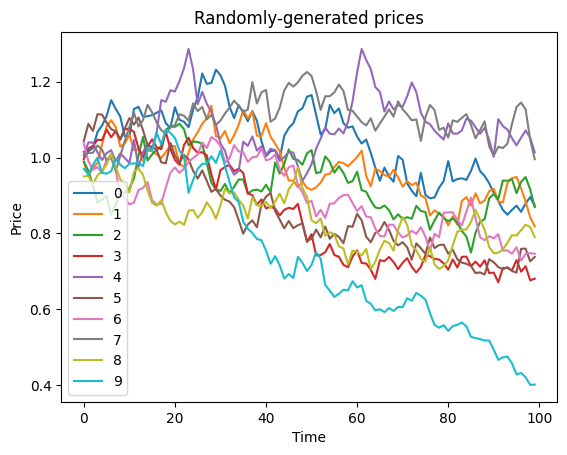

In [3]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

#### pandas Data Structure

A pandas Series is a 1-dimensional array with labels that can contain any data type. We primarly use them for handling time series data.

In [4]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [5]:
print(s.name)

None


In [6]:
s.name = "Toy Series"
print(s.name)

Toy Series


In [7]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [8]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [9]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [10]:
print(s)

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64


##### Accessing Series Elements

In [11]:
print("First element of the Series:", s.iloc[0])
print("Last element of the Series:", s.iloc[len(s)-1])

First element of the Series: 1.0
Last element of the Series: 5.0


In [12]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [13]:
start = 0
end = len(s)
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64

In [14]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

Slice of the Series that starts from the second to last element and ends at the third to last element, taking steps of size 1.

In [18]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [19]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we can just use the square brakets ([]) to access elements, but this is not best practice. The brakets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

You can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values. 

In [21]:
print(s < 3) 

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [22]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~`.

In [23]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


#### Indexing and Time Series

To handle the time component we use `Timestamp` objects. We use our `get_pricing()` method to complete with all the appropriate labels a full time series.  

In [32]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [33]:
prices

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
                 ...    
2015-12-24    495.100006
2015-12-28    493.519989
2015-12-29    489.940002
2015-12-30    485.790009
2015-12-31    479.850006
Name: Adj Close, Length: 1006, dtype: float64

In [34]:
print("\n", type(prices))
prices.head(5)


 <class 'pandas.core.series.Series'>


Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: Adj Close, dtype: float64

In [35]:
print('Old name:', prices.name)
prices.name = symbol
print('New name', prices.name)

Old name: Adj Close
New name CMG


In [36]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


Notice that this DatetimeIndex has a collection of associated information. In particular it has an associated frquency (`freq`). The freq. indicates whether the data is daily vs monthly vs some other period. 
If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because of markets days. Let's use `resample()` method.

In [38]:
monthly_prices = prices.resample('M')
monthly_prices